## ARCH Model Estimation

**Functions**

`arch.arch_model`

### Exercise 50

Download 10 years of data for the S&P 500 and the EUR/USD exchange rate from FRED.


In [1]:
# Setup
%matplotlib inline

In [2]:
import pandas as pd
import pandas_datareader as pdr
import os

if not os.path.exists("./data/arch-data.h5"):
    sp500 = pdr.get_data_fred("SP500", start="2010-1-1", end="2020-1-1").dropna()
    eurusd = pdr.get_data_fred("DEXUSEU", start="2010-1-1", end="2020-1-1").dropna()
    
    with pd.HDFStore("./data/arch-data.h5", mode="w") as store:
        store.put("sp500", sp500)
        store.put("eurusd", eurusd)

sp500 = pd.read_hdf("./data/arch-data.h5", "sp500")        
eurusd = pd.read_hdf("./data/arch-data.h5", "eurusd")

#### Discussion
We can use pandas-datareader to download the data from FRED.  The data is then
stored to HDF for use later.  The `if` statement checks if the HDF file already
exists, and if found, skips downloading the data.
 

### Exercise 51

Estimate a GARCH(1,1) and a GJR-GARCH(1,1,1) to the returns of both series.

**Note**: You need to install arch using

```bash
pip install arch
```

which contains ARCH and related models.

Documentation and examples for the arch package [are available online](https://bashtage.github.io/arch).

In [3]:
from arch import arch_model

sp500_ret = 100 * sp500.pct_change().dropna()
eurusd_ret = 100 * eurusd.pct_change().dropna()

In [4]:
garch = arch_model(sp500_ret)
res_sp500 = garch.fit()
res_sp500.summary()

c:\git\arch\arch\univariate\base.py:258: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8663. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3014.5904796994937
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3012.5320163673546
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3010.8018521477507
Iteration:      4,   Func. Count:     34,   Neg. LLF: 3008.5143232433074
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2998.346786586049
Iteration:      6,   Func. Count:     48,   Neg. LLF: 2998.1375306832733
Iteration:      7,   Func. Count:     54,   Neg. LLF: 2997.09170615809
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2997.0652133931894
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2997.0613460511386
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2997.0607371388223
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2997.060725515717
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2997.0607255160044
            Iterations: 11
            Function evaluations: 78
            Gradient evalua

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  SP500   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -2997.06
Distribution:                  Normal   AIC:                           6002.12
Method:            Maximum Likelihood   BIC:                           6025.43
                                        No. Observations:                 2510
Date:                Fri, Jan 24 2020   Df Residuals:                     2506
Time:                        23:59:08   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0817  1.397e-02      5.845  5.081e-09 [5.429e-02,  0.109]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0360  8.098e-03      4.452  8.514e-06 [2.018e-02,5.192e-02]
alpha[1]       0.1688  2.472e-02      6.830  8.479e-12     [  0.120,  0.217]
beta[1]        0.7923  2.409e-02     32.887 3.400e-237     [  0.745,  0.839]
============================================================================

Covariance estimator: robust
"""

#### Discussion
The default model is a GARCH(1,1).  The function `arch_model` returns the model, and
the method `fit` estimates the parameters.  This is the same pattern as in `statsmodels`. 

In [5]:
gjr_garch = arch_model(sp500_ret, p=1, o=1, q=1)
gjr_res_sp500 = gjr_garch.fit(disp="off")
gjr_res_sp500.summary()


c:\git\arch\arch\univariate\base.py:258: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8663. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  SP500   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2929.70
Distribution:                  Normal   AIC:                           5869.41
Method:            Maximum Likelihood   BIC:                           5898.55
                                        No. Observations:                 2510
Date:                Fri, Jan 24 2020   Df Residuals:                     2505
Time:                        23:59:08   Df Model:                            5
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0417  1.353e-02      3.078  2.086e-03 [1.513e-02,6.818e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0349  5.870e-03      5.942  2.808e-09  [2.338e-02,4.639e-02]
alpha[1]       0.0000  3.042e-02      0.000      1.000 [-5.962e-02,5.962e-02]
gamma[1]       0.2799  4.204e-02      6.659  2.764e-11      [  0.198,  0.362]
beta[1]        0.8176  2.372e-02     34.469 2.307e-260      [  0.771,  0.864]
=============================================================================

Covariance estimator: robust
"""

#### Discussion

A GJR-GARCH sets the parameter `o` to 1.  I set `p` and `q` for clarity. The
default values for these two parameters is already 1. 

In [6]:
garch = arch_model(eurusd_ret)
res_eurusd = garch.fit()
res_eurusd.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1909.670911265314
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1909.6240770056836
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1909.5927943562629
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1899.5393106975166
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1890.8885098281726
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1887.7746476628995
Iteration:      7,   Func. Count:     55,   Neg. LLF: 1886.4613380882947
Iteration:      8,   Func. Count:     63,   Neg. LLF: 1886.4609576891562
Iteration:      9,   Func. Count:     70,   Neg. LLF: 1886.4373086193107
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1886.4203355301001
Iteration:     11,   Func. Count:     82,   Neg. LLF: 1886.4203037072375
Iteration:     12,   Func. Count:     88,   Neg. LLF: 1886.4203000289622
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1886.4203000266486
            Ite

c:\git\arch\arch\univariate\base.py:258: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.3051. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                DEXUSEU   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1886.42
Distribution:                  Normal   AIC:                           3780.84
Method:            Maximum Likelihood   BIC:                           3804.14
                                        No. Observations:                 2501
Date:                Fri, Jan 24 2020   Df Residuals:                     2497
Time:                        23:59:09   Df Model:                            4
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.6710e-03  9.141e-03     -0.839      0.401 [-2.559e-02,1.024e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.3181e-04  6.328e-04      0.998      0.318 [-6.085e-04,1.872e-03]
alpha[1]       0.0272  6.165e-03      4.413  1.020e-05  [1.512e-02,3.929e-02]
beta[1]        0.9705  6.731e-03    144.187      0.000      [  0.957,  0.984]
=============================================================================

Covariance estimator: robust
"""

In [7]:
gjr_garch = arch_model(eurusd_ret, p=1, o=1, q=1)
gjr_res_eurusd = gjr_garch.fit(disp="off")
gjr_res_eurusd.summary()



c:\git\arch\arch\univariate\base.py:258: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.3051. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                DEXUSEU   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1878.59
Distribution:                  Normal   AIC:                           3767.18
Method:            Maximum Likelihood   BIC:                           3796.31
                                        No. Observations:                 2501
Date:                Fri, Jan 24 2020   Df Residuals:                     2496
Time:                        23:59:09   Df Model:                            5
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0122  9.172e-03     -1.331      0.183 [-3.018e-02,5.772e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      8.8693e-05  3.516e-04      0.252      0.801 [-6.004e-04,7.777e-04]
alpha[1]   6.1167e-03  6.772e-03      0.903      0.366 [-7.157e-03,1.939e-02]
gamma[1]       0.0232  5.936e-03      3.908  9.309e-05  [1.156e-02,3.483e-02]
beta[1]        0.9817  6.103e-03    160.863      0.000      [  0.970,  0.994]
=============================================================================

Covariance estimator: robust
"""

### Exercise 52
Comment on the asymmetry.

  * Compare robust and non-robust standard errors.
  * Plot the fit variance and fit volatility.
  * Plot the standardized residuals.


In [8]:
gjr_garch = arch_model(sp500_ret, p=1, o=1, q=1)
gjr_res_sp500_non = gjr_garch.fit(cov_type="classic", disp="off")
gjr_res_sp500_non.summary()

c:\git\arch\arch\univariate\base.py:258: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8663. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  SP500   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2929.70
Distribution:                  Normal   AIC:                           5869.41
Method:            Maximum Likelihood   BIC:                           5898.55
                                        No. Observations:                 2510
Date:                Fri, Jan 24 2020   Df Residuals:                     2505
Time:                        23:59:09   Df Model:                            5
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0417  1.358e-02      3.067  2.163e-03 [1.503e-02,6.828e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0349  4.262e-03      8.184  2.749e-16  [2.653e-02,4.324e-02]
alpha[1]       0.0000  1.750e-02      0.000      1.000 [-3.430e-02,3.430e-02]
gamma[1]       0.2799  3.051e-02      9.174  4.541e-20      [  0.220,  0.340]
beta[1]        0.8176  1.794e-02     45.568      0.000      [  0.782,  0.853]
=============================================================================

Covariance estimator: classic
"""

#### Discussion

We can set `disp` to "off" to suppress output.  


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


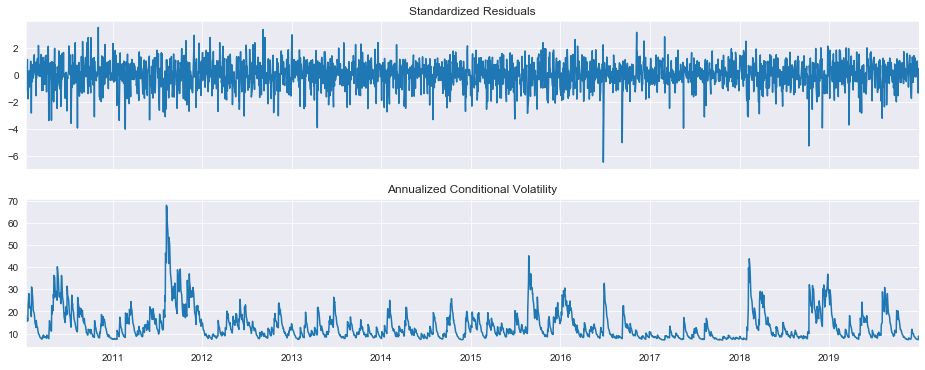

In [10]:
plt.rc("figure",figsize=(16, 6))
fig = gjr_res_sp500.plot(annualize="D")

#### Discussion
We can use the `plot` method on the result to plot the annualized volatility.
The top panel contains the standardized residuals,

$$ \frac{\left(r_t-\hat{\mu}\right)}{\hat{\sigma}_t}. $$

The bottom shows the conditional volatility.

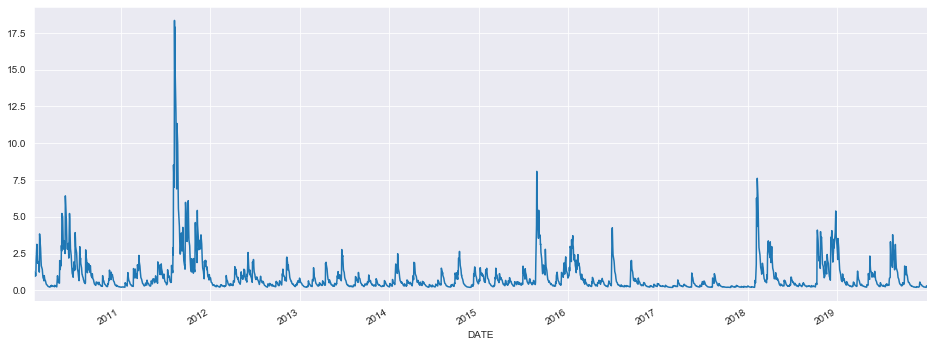

In [11]:
plt.rc("figure", figsize=(16,6))
vol = gjr_res_sp500.conditional_volatility
var = vol**2
ax = var.plot()

#### Discussion

The result contains the volatility which must be squared to get the conditional
variance. 